In [506]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [507]:
df = pd.read_csv('/Users/macbookair/Downloads/Sleep_Efficiency.csv')
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

My dataset includes numerous values which possibly affect one's sleep efficiency. In my analysis, i will not consider some values like 'REM sleep precentage', 'Deep sleep precentage' and more, because 'Sleep efficiency' is more likely already calculated according to those values.

# The hypothesis
My hypothesis is, bad habits negatively affect sleep efficiency, while better lifestyle levels lead to greater values of sleep quality. I will check my hypothesis according to the information provided by the dataset.

# Cleaning up

I want to check for NaN values and drop them in order to increase my analysis accuracy. Also, dropping the columns which i will not work with to have a cleaner look of the dataset.

In [509]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [510]:


df.dropna(subset=['Awakenings', 'Caffeine consumption',
                   'Alcohol consumption', 'Exercise frequency'], inplace=True)
df.drop(columns=['ID', 'Age', 'Gender', 'REM sleep percentage', 'Deep sleep percentage',
                  'Light sleep percentage', 'Awakenings', 'Sleep duration', 'Caffeine consumption'], inplace=True)
df



,Bedtime,Wakeup time,Sleep efficiency,Alcohol consumption,Smoking status,Exercise frequency
0,2021-03-06 01:00:00,2021-03-06 07:00:00,0.88,0.0,Yes,3.0
1,2021-12-05 02:00:00,2021-12-05 09:00:00,0.66,3.0,Yes,3.0
2,2021-05-25 21:30:00,2021-05-25 05:30:00,0.89,0.0,No,3.0
3,2021-11-03 02:30:00,2021-11-03 08:30:00,0.51,5.0,Yes,1.0
4,2021-03-13 01:00:00,2021-03-13 09:00:00,0.76,3.0,No,3.0
...,...,...,...,...,...,...
445,2021-11-16 23:00:00,2021-11-16 06:30:00,0.53,2.0,Yes,1.0
447,2021-11-13 22:00:00,2021-11-13 05:30:00,0.91,0.0,No,5.0
448,2021-03-31 21:00:00,2021-03-31 03:00:00,0.74,0.0,No,3.0
450,2021-07-29 21:00:00,2021-07-29 04:00:00,0.76,0.0,No,3.0


## Converting values

I want to convert non numerical values in the column 'Smoking status' to numerical. 'yes' will be equivalent to 1 and 'no' will be equivalent to 0.

In [511]:
df['Smoking status'] = df['Smoking status'].str.lower()
df['Smoking status'] = df['Smoking status'].map({'yes': 1, 'no': 0})
df

,Bedtime,Wakeup time,Sleep efficiency,Alcohol consumption,Smoking status,Exercise frequency
0,2021-03-06 01:00:00,2021-03-06 07:00:00,0.88,0.0,1,3.0
1,2021-12-05 02:00:00,2021-12-05 09:00:00,0.66,3.0,1,3.0
2,2021-05-25 21:30:00,2021-05-25 05:30:00,0.89,0.0,0,3.0
3,2021-11-03 02:30:00,2021-11-03 08:30:00,0.51,5.0,1,1.0
4,2021-03-13 01:00:00,2021-03-13 09:00:00,0.76,3.0,0,3.0
...,...,...,...,...,...,...
445,2021-11-16 23:00:00,2021-11-16 06:30:00,0.53,2.0,1,1.0
447,2021-11-13 22:00:00,2021-11-13 05:30:00,0.91,0.0,0,5.0
448,2021-03-31 21:00:00,2021-03-31 03:00:00,0.74,0.0,0,3.0
450,2021-07-29 21:00:00,2021-07-29 04:00:00,0.76,0.0,0,3.0


Converting columns 'Bedtime' and 'Wakeup time' to integers and dropping the date since we do not need it in our analysis.

In [512]:
df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.hour
df['Wakeup time'] = pd.to_datetime(df['Wakeup time']).dt.hour
df

,Bedtime,Wakeup time,Sleep efficiency,Alcohol consumption,Smoking status,Exercise frequency
0,1,7,0.88,0.0,1,3.0
1,2,9,0.66,3.0,1,3.0
2,21,5,0.89,0.0,0,3.0
3,2,8,0.51,5.0,1,1.0
4,1,9,0.76,3.0,0,3.0
...,...,...,...,...,...,...
445,23,6,0.53,2.0,1,1.0
447,22,5,0.91,0.0,0,5.0
448,21,3,0.74,0.0,0,3.0
450,21,4,0.76,0.0,0,3.0


Now the dataset is clean and ready to be analysed.

## Introducing the values

In [513]:

sleep_efficiency_counts = df['Sleep efficiency'].value_counts().sort_index()


fig = px.line(
    sleep_efficiency_counts, 
    x=sleep_efficiency_counts.index, 
    y=sleep_efficiency_counts.values,
    title='Count of Each Sleep Efficiency Value',
    labels={'x': 'Sleep Efficiency', 'y': 'Count'},
    line_shape='spline',
    line_dash_sequence=['solid'],
    
)


fig.update_traces(
    fill='tozeroy',
    fillcolor='rgba(255, 99, 71, 0.2)',
    line=dict(color='pink', width=2)
)


fig.update_layout(
    xaxis_title='Sleep Efficiency',
    yaxis_title='Count',
    font={'size': 10, 'family': 'Arial', 'color': '#4d4d4d'}, 
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor='rgba(255, 255, 255, 0.8)',
        font_size=8,
        font_family='Arial',
        font_color='black'
    ),
    template='plotly_white',
    showlegend=False,
    margin=dict(l=50, r=50, b=50, t=70)
)

# Step 5: Show the graph
fig.show()


In [514]:
 

available_columns = ['Sleep efficiency', 'Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Bedtime', 'Wakeup time']

for column in available_columns:
    fig = px.histogram(df, x=column, nbins=30,
                       title=f'Distribution of {column}',
                       labels={column: column},
                       color_discrete_sequence=["skyblue"])
    

    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Count',
        template='plotly_white',
        hovermode="x unified",
        bargap=0.2,
        margin=dict(l=50, r=50, b=50, t=70)
        
    )

    fig.show()



As can be seen, i will be comparing alcohol consumption, smoking status, exercise frequency, bedtime and wakeup time to sleep efficiency. All the diagrams in my project are made using plotly library. I could use matplotlib, for instance, but since I am planning to add those diagrams to the webpage, they have to be interactive and look more or less modern, which you cannot achieve by using matplotlib.

## The correlation between sleep efficiency and different habits

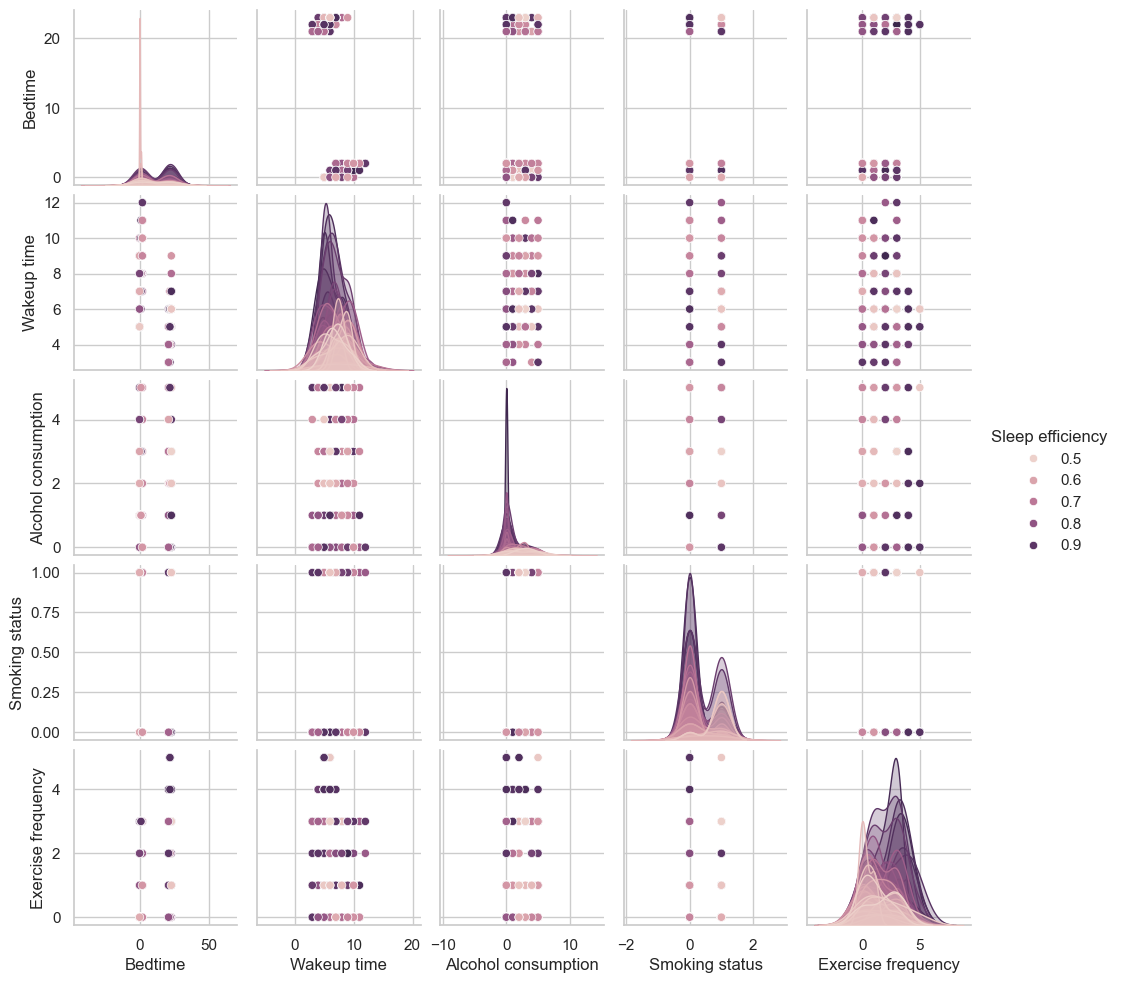

In [515]:
sns.pairplot(df,hue = 'Sleep efficiency', height = 2)

This plot gives us a general idea, but let us consider each habit one at a time.

In [516]:

available_columns = ['Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Bedtime', 'Wakeup time']
for column in available_columns:
    fig = px.scatter(df, x=column, y='Sleep efficiency',
                 title=f"Correlation Between {column} and Sleep Efficiency",
                 labels={"Alcohol consumption": "Alcohol Consumption (1-5)",
                         "Sleep Efficiency": "Sleep Efficiency"})
    
    fig.update_traces(marker=dict(size=10, opacity=0.5, color='skyblue'),
                  selector=dict(mode='markers'))

    fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='white',
        title_font=dict(size=16, color='grey', family="Arial, sans-serif"),
        margin=dict(l=50, r=50, b=50, t=70),
        hovermode='closest',
        template='plotly_white')

    fig.show()



In [517]:
for column in available_columns:
    correlation = df['Sleep efficiency'].corr(df[column])
    print(f"Correlation between sleep efficiency and {column}: {correlation}")


Correlation between sleep efficiency and Alcohol consumption: -0.3970116034890015
Correlation between sleep efficiency and Smoking status: -0.2928981507429906
Correlation between sleep efficiency and Exercise frequency: 0.266050015169006
Correlation between sleep efficiency and Bedtime: 0.16016283589386893
Correlation between sleep efficiency and Wakeup time: -0.15677701474464073


The scatter plots illustrate the correlation between sleep efficiency and different habits. I have also calculated the correlation to make a general conclustion. This is what we can notice from the correlation:
1) Alcohol consumption does negatively affect sleep efficiency
2) Smoking also causes poor sleep, but the correlation is negligible
3) Exersice shows a slight positive affect on the quality of sleep
4) Bedtime does not seem to really affect one's sleep
5) Wakeup time has an unsignificant affect on sleep. Late awakening tends to cause a decline is one's sleep efficiency

Overall, all the habits negligibly influence the quality of sleep in different ways. Nevertheless, it is evident that alcohol is taking the lead in the correlation.

# Indicating a good and a bad lifestyle according to the habits

In [518]:

alcohol_median = df['Alcohol consumption'].median()
smoking_median = df['Smoking status'].median()
exercise_median = df['Exercise frequency'].median()
bedtime_median = df['Bedtime'].median()
wakeup_median = df['Wakeup time'].median()


df['Bad lifestyle'] = 0 
df['Good lifestyle'] = 0

df.loc[df['Alcohol consumption'] > alcohol_median, 'Bad lifestyle'] += 1
df.loc[df['Smoking status'] > smoking_median, 'Bad lifestyle'] += 1
df.loc[df['Exercise frequency'] < exercise_median, 'Bad lifestyle'] += 1
df.loc[df['Bedtime'] > bedtime_median, 'Bad lifestyle'] += 1
df.loc[df['Wakeup time'] < wakeup_median, 'Bad lifestyle'] += 1



df['Good lifestyle'] = 5 - df['Bad lifestyle'] 
df


,Bedtime,Wakeup time,Sleep efficiency,Alcohol consumption,Smoking status,Exercise frequency,Bad lifestyle,Good lifestyle
0,1,7,0.88,0.0,1,3.0,1,4
1,2,9,0.66,3.0,1,3.0,2,3
2,21,5,0.89,0.0,0,3.0,2,3
3,2,8,0.51,5.0,1,1.0,3,2
4,1,9,0.76,3.0,0,3.0,1,4
...,...,...,...,...,...,...,...,...
445,23,6,0.53,2.0,1,1.0,5,0
447,22,5,0.91,0.0,0,5.0,2,3
448,21,3,0.74,0.0,0,3.0,2,3
450,21,4,0.76,0.0,0,3.0,2,3


I added two new columns indicating the lifestyle level of the subjects. I considered all the habits i am working with, calculated the median for each column. Then, if the value is greater or smaller than the median value of the corresponding column, i add 1 to the column 'Bad lifestyle', then i set the column 'Good lifestyle' as the inverse of 'Bad lifestyle'.

## Visualising the new columns

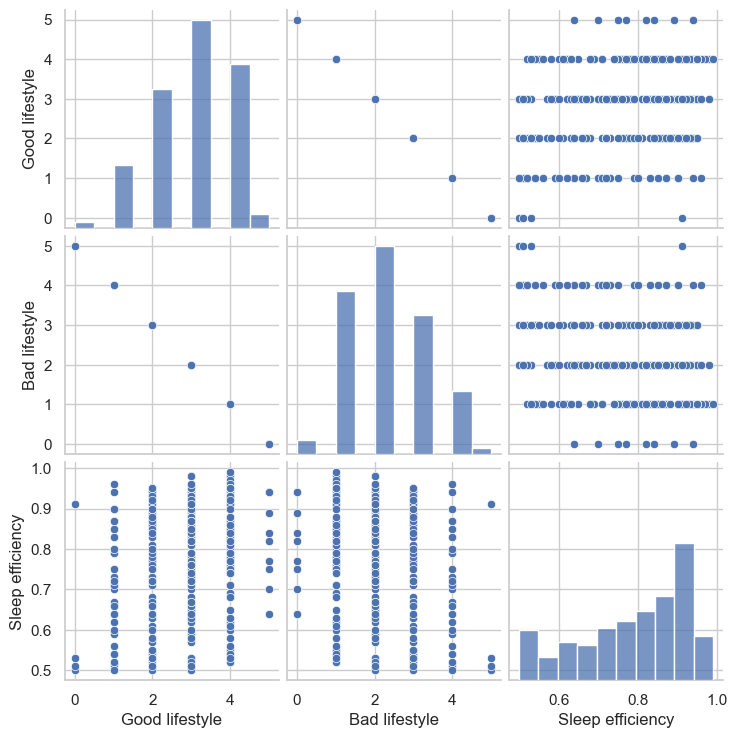

In [519]:
sns.pairplot(df[['Good lifestyle', 'Bad lifestyle', 'Sleep efficiency']])
plt.show()

In [520]:

fig1 = go.Figure()

fig1.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Good lifestyle'] == 1],
    name='Good Lifestyle 1',
    boxmean=True,
    marker_color='skyblue',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig1.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Good lifestyle'] == 2],
    name='Good Lifestyle 2',
    boxmean=True,
    marker_color='lightblue',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig1.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Good lifestyle'] == 3],
    name='Good Lifestyle 3',
    boxmean=True,
    marker_color='skyblue',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig1.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Good lifestyle'] == 4],
    name='Good Lifestyle 4',
    boxmean=True,
    marker_color='blue',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig1.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Good lifestyle'] == 5],
    name='Good Lifestyle 5',
    boxmean=True,
    marker_color='darkblue',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig1.update_layout(
    title="Good Lifestyle vs Sleep Efficiency",
    xaxis_title="Good Lifestyle Level",
    template='plotly_white',
    yaxis_title="Sleep Efficiency",
    showlegend=False,
    width=800,
    boxgap=0.3,
)

fig1.show()


fig2 = go.Figure()

fig2.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Bad lifestyle'] == 1],
    name='Bad Lifestyle 1',
    boxmean=True,
    marker_color='pink',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig2.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Bad lifestyle'] == 2],
    name='Bad Lifestyle 2',
    boxmean=True,
    marker_color='lightpink',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig2.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Bad lifestyle'] == 3],
    name='Bad Lifestyle 3',
    boxmean=True,
    marker_color='salmon',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig2.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Bad lifestyle'] == 4],
    name='Bad Lifestyle 4',
    boxmean=True,
    marker_color='red',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig2.add_trace(go.Box(
    y=df['Sleep efficiency'][df['Bad lifestyle'] == 5],
    name='Bad Lifestyle 5',
    boxmean=True,
    marker_color='darkred',
    boxpoints='all',
    jitter=0.05,
    width=0.4,
))

fig2.update_layout(
    title="Bad Lifestyle vs Sleep Efficiency",
    template='plotly_white',
    xaxis_title="Bad Lifestyle Level",
    yaxis_title="Sleep Efficiency",
    showlegend=False,
    width=800,
    boxgap=0.3, 
)

fig2.show()

good_lifestyle_corr = df['Good lifestyle'].corr(df['Sleep efficiency'])
bad_lifestyle_corr = df['Bad lifestyle'].corr(df['Sleep efficiency'])

print(f"Correlation between good lifestyle and sleep efficiency: {good_lifestyle_corr}")
print(f"Correlation between bad lifestyle and sleep efficiency: {bad_lifestyle_corr}")







Correlation between good lifestyle and sleep efficiency: 0.24237618254579527
Correlation between bad lifestyle and sleep efficiency: -0.24237618254579527


It is obvious that extremely bad lifestyle markedly affects sleep quality. Furthermore, the more bad habits you have, the worse your sleep is, which is quite expected. However, the pattern for Good lifestyle is not transparent. In general, it seems that the healthier your lifestyle is, the better your sleep is, but there is an unclear trend in the last 2 values of 'Good lifestyle'. 'Good lifestyle 4' seems to indicate better results than 'Good lifestyle 5'. Let us compare good and bad lifestyles.

In [521]:


good_lifestyle_avg = df.groupby('Good lifestyle')['Sleep efficiency'].mean()
bad_lifestyle_avg = df.groupby('Bad lifestyle')['Sleep efficiency'].mean()

x_labels = [1, 2, 3, 4, 5]
good_lifestyle_values = good_lifestyle_avg.loc[x_labels].values
bad_lifestyle_values = bad_lifestyle_avg.loc[x_labels].values

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_labels,
    y=good_lifestyle_values,
    mode='lines+markers',
    name='Good Lifestyle',
    line=dict(color='skyblue', width=2),
    marker=dict(symbol='circle', size=8)
))


fig.add_trace(go.Scatter(
    x=x_labels,
    y=bad_lifestyle_values,
    mode='lines+markers',
    name='Bad Lifestyle',
    line=dict(color='pink', width=2),
    marker=dict(symbol='square', size=8)
))


fig.update_layout(
    title="Comparison of Sleep Efficiency by Lifestyle (Good vs Bad)",
    xaxis_title="Lifestyle Level",
    yaxis_title="Average Sleep Efficiency",
    template="plotly_white",
    legend_title="Lifestyle Type",
    hovermode="closest",
    legend=dict(x=0.8, y=0.7),
    plot_bgcolor='white',
    showlegend=True
)

fig.show()


I was correct, the worse your lifestyle is, the poorer you sleep efficiency is. However, 'Good lifestyle 4' depicts the highest mean (0.814) for sleep efficiency among all values, including 'Good lifestyle 5'. This would mean extremely good lifestyle could actually result in poorer sleep quality.

# Checking hypothesis


Bearing in mind all the analysis i have conducted, my hypothesis is generally true but it needs a specification. Bad habits do negatively affect your sleep, however, leading an extremely healthy lifestyle does not nessecarily lead to high levels of sleep efficiency. For instance, exessive working out can exhaust one's body, leading to a poorer sleep.

<Axes: xlabel='Good lifestyle', ylabel='Sleep efficiency'>

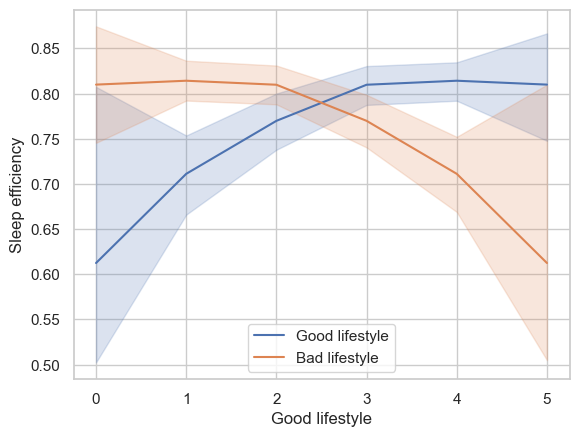

In [522]:
sns.lineplot(data=df, x='Good lifestyle', y='Sleep efficiency', label='Good lifestyle')
sns.lineplot(data=df, x='Bad lifestyle', y='Sleep efficiency', label='Bad lifestyle')

